<h1>Compering LinearSVC, SVC and SGD Classifier on linear data</h1>

In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

In [8]:
X, y = load_iris(return_X_y=True)
X = X[:,(2,3)]

In [14]:
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

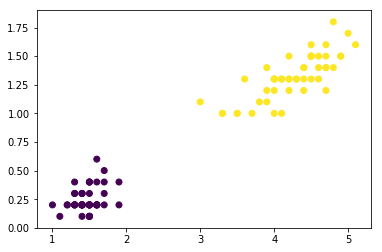

In [15]:
plt.scatter(X[:,0], X[:,1], c=y)

In [16]:
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [18]:
C = 5

svm_linear_clf = LinearSVC(loss = 'hinge', C = C)
svm_SVC = SVC(kernel = 'linear', C = C)
sgd_clf = SGDClassifier(loss = 'hinge')

SS = StandardScaler()
X_scaled = SS.fit_transform(X)


In [19]:
svm_linear_clf.fit(X_scaled, y)
svm_SVC.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [27]:
print(f'Linear SVC: {svm_linear_clf.coef_[0], svm_linear_clf.intercept_}')
print(f'SVC:        {svm_SVC.coef_[0], svm_SVC.intercept_}')
print(f'SGD:        {sgd_clf.coef_[0], sgd_clf.intercept_}')

Linear SVC: (array([ 1.05542413,  1.09851623]), array([ 0.28480655]))
SVC:        (array([ 1.1223101 ,  1.02531081]), array([ 0.31933577]))
SGD:        (array([ 9.25705616,  8.2878454 ]), array([-0.31945789]))


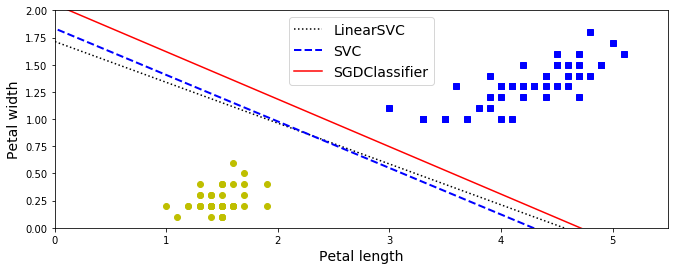

In [33]:
# Calcutaling vector v and b.
w1 = -svm_linear_clf.coef_[0, 0]/svm_linear_clf.coef_[0, 1]
b1 = -svm_linear_clf.intercept_[0]/svm_linear_clf.coef_[0, 1]
w2 = -svm_SVC.coef_[0, 0]/svm_SVC.coef_[0, 1]
b2 = -svm_SVC.intercept_[0]/svm_SVC.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]


# Inversing scaling
line1 = SS.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = SS.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = SS.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

#Generting plot
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris-Versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris-Setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()